# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [0]:
df = pd.read_csv('data/intrusion_detection.csv')

## Import into Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Read from colab instead
df = pd.read_csv('/content/drive/My Drive/1000ml/Project 6 - Intrusion Detection/1000ml_Project6/data/intrusion_detection.csv')

## Basic Exploration

In [7]:
df.head()

,Unnamed: 0,protocol_type = udp,protocol_type = tcp,protocol_type = icmp,service = private,service = domain_u,service = http,service = smtp,service = ftp_data,service = ftp,service = eco_i,service = other,service = auth,service = ecr_i,service = IRC,service = X11,service = finger,service = time,service = telnet,service = ntp_u,service = tim_i,service = remote_job,service = link,service = urp_i,service = pop_3,service = tftp_u,service = imap4,service = nnsp,service = uucp,service = courier,service = login,service = icmp,service = domain,flag = SF,flag = RSTR,flag = S1,flag = REJ,flag = S3,flag = S2,flag = RSTOS0,flag = RSTO,flag = SH,land = 0,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromissed,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbounds_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,id,"outlier@{no,yes}"
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,no
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,4.0,no
2,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,5.0,no
3,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,223.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,6.0,no
4,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,7.0,no


### DTypes

In [8]:
# Unnamed is clearly an index, drop it
# The rest are boolean? 
print(df.dtypes)

Unnamed: 0                       int64
protocol_type = udp            float64
protocol_type = tcp            float64
protocol_type = icmp           float64
service = private              float64
service = domain_u             float64
service = http                 float64
service = smtp                 float64
service = ftp_data             float64
service = ftp                  float64
service = eco_i                float64
service = other                float64
service = auth                 float64
service = ecr_i                float64
service = IRC                  float64
service = X11                  float64
service = finger               float64
service = time                 float64
service = telnet               float64
service = ntp_u                float64
service = tim_i                float64
service = remote_job           float64
service = link                 float64
service = urp_i                float64
service = pop_3                float64
service = tftp_u         

### Lengths

In [0]:
# These numbers match, delete first column
print(f'Num data points = {len(df)}')
df['Unnamed: 0'].nunique()

Num data points = 48113


48113

### Drop First column

In [0]:
df = df.drop(columns='Unnamed: 0')

In [0]:
df.head()

,protocol_type = udp,protocol_type = tcp,protocol_type = icmp,service = private,service = domain_u,service = http,service = smtp,service = ftp_data,service = ftp,service = eco_i,service = other,service = auth,service = ecr_i,service = IRC,service = X11,service = finger,service = time,service = telnet,service = ntp_u,service = tim_i,service = remote_job,service = link,service = urp_i,service = pop_3,service = tftp_u,service = imap4,service = nnsp,service = uucp,service = courier,service = login,service = icmp,service = domain,flag = SF,flag = RSTR,flag = S1,flag = REJ,flag = S3,flag = S2,flag = RSTOS0,flag = RSTO,flag = SH,land = 0,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromissed,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbounds_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,id,"outlier@{no,yes}"
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,no
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,4.0,no
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,5.0,no
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,223.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,6.0,no
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,7.0,no


### Columns Exploration

In [0]:
for col in df.columns:
    print(col, df[col].unique())

protocol_type = udp [1. 0.]
protocol_type = tcp [0. 1.]
protocol_type = icmp [0. 1.]
service = private [1. 0.]
service = domain_u [0. 1.]
service = http [0. 1.]
service = smtp [0. 1.]
service = ftp_data [0. 1.]
service = ftp [0. 1.]
service = eco_i [0. 1.]
service = other [0. 1.]
service = auth [0. 1.]
service = ecr_i [0. 1.]
service = IRC [0. 1.]
service = X11 [0. 1.]
service = finger [0. 1.]
service = time [0. 1.]
service = telnet [0. 1.]
service = ntp_u [0. 1.]
service = tim_i [0. 1.]
service = remote_job [0. 1.]
service = link [0. 1.]
service = urp_i [0. 1.]
service = pop_3 [0. 1.]
service = tftp_u [0. 1.]
service = imap4 [0. 1.]
service = nnsp [0. 1.]
service = uucp [0. 1.]
service = courier [0. 1.]
service = login [0. 1.]
service = icmp [0. 1.]
service = domain [0. 1.]
flag = SF [1. 0.]
flag = RSTR [0. 1.]
flag = S1 [0. 1.]
flag = REJ [0. 1.]
flag = S3 [0. 1.]
flag = S2 [0. 1.]
flag = RSTOS0 [0. 1.]
flag = RSTO [0. 1.]
flag = SH [0. 1.]
land = 0 [1.]
duration [0.0000e+00 1.0000e+

outlier@{no,yes} ['no' 'yes']


In [0]:
# Certainly a good portion of them are. Let's run that again for number unique
for col in df.columns:
    print(f' {col} ... {df[col].nunique()}')

 protocol_type = udp ... 2
 protocol_type = tcp ... 2
 protocol_type = icmp ... 2
 service = private ... 2
 service = domain_u ... 2
 service = http ... 2
 service = smtp ... 2
 service = ftp_data ... 2
 service = ftp ... 2
 service = eco_i ... 2
 service = other ... 2
 service = auth ... 2
 service = ecr_i ... 2
 service = IRC ... 2
 service = X11 ... 2
 service = finger ... 2
 service = time ... 2
 service = telnet ... 2
 service = ntp_u ... 2
 service = tim_i ... 2
 service = remote_job ... 2
 service = link ... 2
 service = urp_i ... 2
 service = pop_3 ... 2
 service = tftp_u ... 2
 service = imap4 ... 2
 service = nnsp ... 2
 service = uucp ... 2
 service = courier ... 2
 service = login ... 2
 service = icmp ... 2
 service = domain ... 2
 flag = SF ... 2
 flag = RSTR ... 2
 flag = S1 ... 2
 flag = REJ ... 2
 flag = S3 ... 2
 flag = S2 ... 2
 flag = RSTOS0 ... 2
 flag = RSTO ... 2
 flag = SH ... 2
 land = 0 ... 1
 duration ... 238
 src_bytes ... 2375
 dst_bytes ... 9169
 wrong_fra

In [0]:
df.columns

Index(['protocol_type = udp', 'protocol_type = tcp', 'protocol_type = icmp',
       'service = private', 'service = domain_u', 'service = http',
       'service = smtp', 'service = ftp_data', 'service = ftp',
       'service = eco_i', 'service = other', 'service = auth',
       'service = ecr_i', 'service = IRC', 'service = X11', 'service = finger',
       'service = time', 'service = telnet', 'service = ntp_u',
       'service = tim_i', 'service = remote_job', 'service = link',
       'service = urp_i', 'service = pop_3', 'service = tftp_u',
       'service = imap4', 'service = nnsp', 'service = uucp',
       'service = courier', 'service = login', 'service = icmp',
       'service = domain', 'flag = SF', 'flag = RSTR', 'flag = S1',
       'flag = REJ', 'flag = S3', 'flag = S2', 'flag = RSTOS0', 'flag = RSTO',
       'flag = SH', 'land = 0', 'duration', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromissed', 'roo

In [0]:
num_cols = ['duration', 'src_bytes', 'dst_bytes',
            'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
            'num_compromissed', 'num_root',
            'num_file_creations', 'num_shells', 'num_access_files',
            'num_outbounds_cmds', 'count',
            'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
           ]

cat_cols = ['protocol_type = udp', 'protocol_type = tcp', 'protocol_type = icmp',
            'service = private', 'service = domain_u', 'service = http',
            'service = smtp', 'service = ftp_data', 'service = ftp','service = eco_i', 
            'service = other', 'service = auth', 'service = ecr_i', 'service = IRC', 
            'service = X11', 'service = finger', 'service = time', 'service = telnet', 
            'service = ntp_u','service = tim_i', 'service = remote_job', 'service = link',
            'service = urp_i', 'service = pop_3', 'service = tftp_u','service = imap4', 
            'service = nnsp', 'service = uucp', 'service = courier', 'service = login', 
            'service = icmp', 'service = domain', 
            'flag = SF', 'flag = RSTR', 'flag = S1', 'flag = REJ', 'flag = S3', 
            'flag = S2', 'flag = RSTOS0', 'flag = RSTO','flag = SH',
            'logged_in', 'is_host_login', 'is_guest_login',
            'root_shell', 'su_attempted',
           ]

In [0]:
df['outlier@{no,yes}'].value_counts()

no     47913
yes      200
Name: outlier@{no,yes}, dtype: int64

### Altering columns

It looks like the symbolic columns have already been dummied. Thus, let's sort through and pick out the categorical columns and separate from the numeric columns.

I will also delete the column `land = 0` since it only contains values of 1.

This is the same for `num_outbounds_cmds`.

id is also as unique as the number of records, and is thus not useful either.

Rename the outlier column to target. It makes the most sense to be the target, as its not in the data dictionary.

In [9]:
# Drop land and id
df_temp = df.drop(columns=['Unnamed: 0','id','land = 0', 'num_outbounds_cmds'])

# make a target column
bool_map = {'yes':1, 'no':0}
df_temp['target'] = df_temp['outlier@{no,yes}'].map(bool_map)

# rename num_compromissed to num_compromised
df_temp.rename(columns={'num_compromissed':'num_compromised'},inplace=True)

# drop outlier column
intrusion_df = df_temp.drop(columns='outlier@{no,yes}')

# Check
intrusion_df.head()

,protocol_type = udp,protocol_type = tcp,protocol_type = icmp,service = private,service = domain_u,service = http,service = smtp,service = ftp_data,service = ftp,service = eco_i,service = other,service = auth,service = ecr_i,service = IRC,service = X11,service = finger,service = time,service = telnet,service = ntp_u,service = tim_i,service = remote_job,service = link,service = urp_i,service = pop_3,service = tftp_u,service = imap4,service = nnsp,service = uucp,service = courier,service = login,service = icmp,service = domain,flag = SF,flag = RSTR,flag = S1,flag = REJ,flag = S3,flag = S2,flag = RSTOS0,flag = RSTO,flag = SH,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,0


In [10]:
print(len(df.columns))
print(len(intrusion_df.columns))

82
78


In [11]:
intrusion_df.target.value_counts()

0    47913
1      200
Name: target, dtype: int64

# Deeper Exploration

In [0]:
# The columns of use

num_cols = ['duration', 'src_bytes', 'dst_bytes',
            'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
            'num_compromised', 'num_root', 'count',
            'num_file_creations', 'num_shells', 'num_access_files',
            'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
           ]

cat_cols = ['protocol_type = udp', 'protocol_type = tcp', 'protocol_type = icmp',
            'service = private', 'service = domain_u', 'service = http',
            'service = smtp', 'service = ftp_data', 'service = ftp','service = eco_i', 
            'service = other', 'service = auth', 'service = ecr_i', 'service = IRC', 
            'service = X11', 'service = finger', 'service = time', 'service = telnet', 
            'service = ntp_u','service = tim_i', 'service = remote_job', 'service = link',
            'service = urp_i', 'service = pop_3', 'service = tftp_u','service = imap4', 
            'service = nnsp', 'service = uucp', 'service = courier', 'service = login', 
            'service = icmp', 'service = domain', 
            'flag = SF', 'flag = RSTR', 'flag = S1', 'flag = REJ', 'flag = S3', 
            'flag = S2', 'flag = RSTOS0', 'flag = RSTO','flag = SH',
            'logged_in', 'is_host_login', 'is_guest_login',
            'root_shell', 'su_attempted',
           ]

target = 'target'

In [13]:
# QC - This should be 78 to match the number of columns of the original DF
len(num_cols)+len(cat_cols)+1

78

In [14]:
len(cat_cols)

46

## Correlation Matrix

When we start doing modelling - keep an eye out for the following pairs of variables as they are highly collinear

* `srv_serror_rate` and `serror_rate` - 96%
* `num_root` and `num_compromised` - 99%
* `serror_rate` and `dst_host_srv_serror_rate` - 85%
* `srv_serror_rate` and `dst_host_srv_serror_rate` - 86%
* `dst_host_serror_rate` and `dst_host_srv_serror_rate` 83%

Be wary of some of the dummied variables. Some of them within the same category follow a "if not one then the other" pattern, giving an implicit near -1 correlation. 

In [45]:
intrusion_df[cat_cols+[target]].corr()

,protocol_type = udp,protocol_type = tcp,protocol_type = icmp,service = private,service = domain_u,service = http,service = smtp,service = ftp_data,service = ftp,service = eco_i,service = other,service = auth,service = ecr_i,service = IRC,service = X11,service = finger,service = time,service = telnet,service = ntp_u,service = tim_i,service = remote_job,service = link,service = urp_i,service = pop_3,service = tftp_u,service = imap4,service = nnsp,service = uucp,service = courier,service = login,service = icmp,service = domain,flag = SF,flag = RSTR,flag = S1,flag = REJ,flag = S3,flag = S2,flag = RSTOS0,flag = RSTO,flag = SH,logged_in,is_host_login,is_guest_login,root_shell,su_attempted,target
protocol_type = udp,1.000000,-0.962065,-0.022333,0.484218,0.820679,-0.607979,-0.078119,-0.043890,-0.015338,-0.009337,0.103309,-0.012588,-0.017361,-0.006111,-0.002666,-0.017617,-0.006533,-0.014313,0.122840,-0.003266,-0.001333,-0.001333,-0.009892,-0.005164,0.015591,-0.001333,-0.001333,-0.001333,-0.001333,-0.001333,-0.001885,-0.001333,0.019546,-0.009144,-0.005498,-0.009337,-0.002666,-0.004807,-0.001333,-0.002309,-0.011934,-0.802619,-0.002666,-0.014622,-0.008947,-0.002530,0.005091
protocol_type = tcp,-0.962065,1.000000,-0.251266,-0.465576,-0.789547,0.631952,0.081199,0.045620,0.015942,-0.105048,-0.099054,0.013085,-0.195333,0.006351,0.002772,0.018312,0.006790,0.014878,-0.118180,-0.036743,0.001386,0.001386,-0.111301,0.005368,-0.014999,0.001386,0.001386,0.001386,0.001386,0.001386,0.001960,0.001386,-0.020316,0.009505,0.005714,0.009705,0.002772,0.004997,0.001386,0.002400,0.012404,0.834266,0.002772,0.015199,0.009300,0.002629,-0.056989
protocol_type = icmp,-0.022333,-0.251266,1.000000,-0.011817,-0.018328,-0.158788,-0.020403,-0.011463,-0.004006,0.418075,-0.003537,-0.003288,0.777396,-0.001596,-0.000696,-0.004601,-0.001706,-0.003738,-0.002743,0.146230,-0.000348,-0.000348,0.442960,-0.001349,-0.000348,-0.000348,-0.000348,-0.000348,-0.000348,-0.000348,-0.000492,-0.000348,0.005105,-0.002388,-0.001436,-0.002438,-0.000696,-0.001256,-0.000348,-0.000603,-0.003117,-0.209623,-0.000696,-0.003819,-0.002337,-0.000661,0.190774
service = private,0.484218,-0.465576,-0.011817,1.000000,-0.037133,-0.321711,-0.041337,-0.023224,-0.008116,-0.004940,-0.007167,-0.006661,-0.009187,-0.003233,-0.001411,-0.009322,-0.003457,-0.007574,-0.005558,-0.001728,-0.000705,-0.000705,-0.005235,-0.002733,-0.000705,-0.000705,-0.000705,-0.000705,-0.000705,-0.000705,-0.000998,-0.000705,-0.171546,0.025981,0.004409,0.003684,-0.001411,0.005825,0.029464,-0.001222,0.250247,-0.424705,-0.001411,-0.007737,-0.004734,-0.001339,0.178122
service = domain_u,0.820679,-0.789547,-0.018328,-0.037133,1.000000,-0.498956,-0.064111,-0.036019,-0.012587,-0.007662,-0.011116,-0.010331,-0.014248,-0.005015,-0.002188,-0.014458,-0.005361,-0.011747,-0.008620,-0.002680,-0.001094,-0.001094,-0.008119,-0.004238,-0.001094,-0.001094,-0.001094,-0.001094,-0.001094,-0.001094,-0.001547,-0.001094,0.016041,-0.007504,-0.004512,-0.007662,-0.002188,-0.003945,-0.001094,-0.001895,-0.009794,-0.658692,-0.002188,-0.012000,-0.007343,-0.002076,-0.015505
service = http,-0.607979,0.631952,-0.158788,-0.321711,-0.498956,1.000000,-0.555438,-0.312064,-0.109053,-0.066385,-0.096302,-0.089505,-0.123441,-0.043447,-0.018958,-0.125260,-0.046448,-0.101770,-0.074684,-0.023220,-0.009479,-0.009479,-0.070337,-0.036717,-0.009479,-0.009479,-0.009479,-0.009479,-0.009479,-0.009479,-0.013405,-0.009479,0.099790,-0.065015,-0.002283,-0.024680,-0.007286,-0.005043,-0.009479,-0.016418,-0.084851,0.751870,-0.018958,-0.103965,-0.032283,-0.017985,-0.132676
service = smtp,-0.078119,0.081199,-0.020403,-0.041337,-0.064111,-0.555438,1.000000,-0.040097,-0.014012,-0.008530,-0.012374,-0.011501,-0.015861,-0.005582,-0.002436,-0.016095,-0.005968,-0.013076,-0.009596,-0.002983,-0.001218,-0.001218,-0.009038,-0.004718,-0.001218,-0.001218,-0.001218,-0.001218,-0.001218,-0.001218,-0.001722,-0.001218,-0.012206,-0.008354,-0.005023,0.046348,-0.002436,0.010823,-0.001218,-0.002110,-0.010903,0.091111,-0

## Predictive Power Score

In the case of this data, we find little other than linear correlation between the different variables, it wouldn't make any sense to continue investigating polynomial type features.

This is also not particularly useful because the set of values which is considered dangerous are very few. Thus, there is no further use for PPS

In [21]:
pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=de4acbb4cbbf6bf0b7158cd459fcc4824fc929524d6e510e824068c864ab9a46
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [0]:
import ppscore as pps

In [0]:
pps_matrix = pps.matrix(intrusion_df[num_cols+[target]])

In [28]:
pps_matrix.iloc[-1,:]

duration                       0.000000
src_bytes                      0.283817
dst_bytes                      0.000000
wrong_fragment                 0.374032
urgent                         0.000007
hot                            0.000007
num_failed_logins              0.000007
num_compromised                0.139471
num_root                       0.139471
count                          0.000007
num_file_creations             0.158008
num_shells                     0.077780
num_access_files               0.000000
srv_count                      0.000007
serror_rate                    0.469466
srv_serror_rate                0.488003
rerror_rate                    0.000007
srv_rerror_rate                0.000007
same_srv_rate                  0.000007
diff_srv_rate                  0.000007
srv_diff_host_rate             0.000007
dst_host_count                 0.000000
dst_host_srv_count             0.000007
dst_host_same_srv_rate         0.000007
dst_host_diff_srv_rate         0.507184


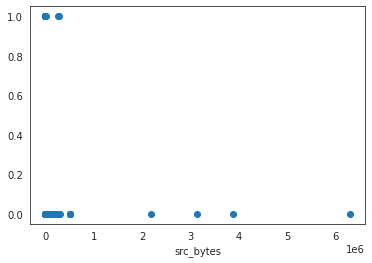

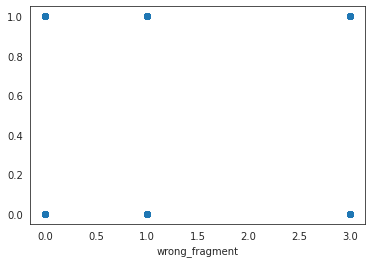

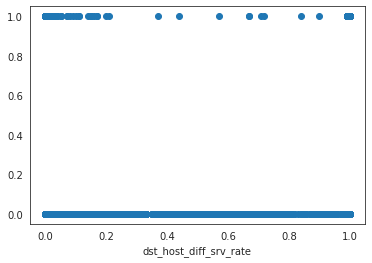

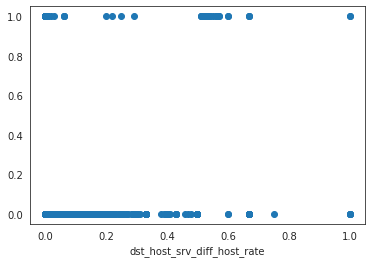

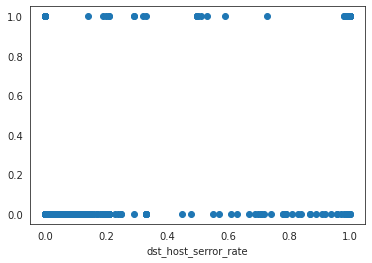

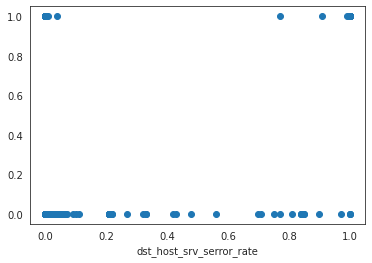

In [32]:
sns.set_style('white')
high_relation_ls = ['src_bytes','wrong_fragment','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate',
                    'dst_host_serror_rate','dst_host_srv_serror_rate']
for col in high_relation_ls:
  plt.scatter(intrusion_df[col],intrusion_df['target'])
  plt.xlabel(col)
  plt.show()

In [33]:
pps_matrix

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,count,num_file_creations,num_shells,num_access_files,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
duration,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
src_bytes,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dst_bytes,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wrong_fragment,0.000013,0.839880,0.000013,1.000000,0.000013,0.000013,0.000013,0.000013,0.000013,0.000000,0.000013,0.000013,0.000013,0.000000,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000000,0.000013,0.000000,0.366575,0.077644,0.000013,0.000000,0.000013,0.000013
urgent,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
hot,0.221812,0.000000,0.000000,0.000006,0.000006,1.000000,0.000006,0.019491,0.019491,0.000006,0.071887,0.019570,0.000000,0.000006,0.000000,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000000,0.000000,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000000,0.000006
num_failed_logins,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
num_compromised,0.000000,0.000000,0.000000,0.000020,0.000020,0.000020,0.000020,1.000000,0.199920,0.000020,0.000020,0.066618,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.000000,0.000020,0.000020,0.000000,0.000020
num_root,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249933,1.000000,0.000000,0.000000,0.083311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,0.000000,0.274947,0.246066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.714189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


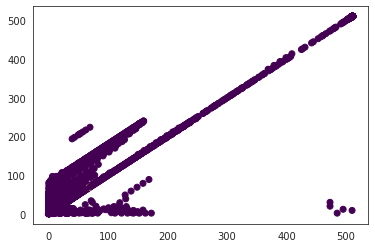

In [49]:
plt.scatter(intrusion_df['count'],intrusion_df['srv_count'],c=intrusion_df['target'],cmap='viridis')

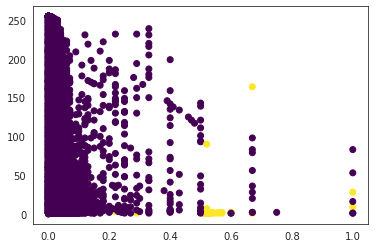

In [50]:
plt.scatter(intrusion_df['dst_host_srv_diff_host_rate'],intrusion_df['dst_host_count'],c=intrusion_df['target'],cmap='viridis')

# Export the New Data

In [0]:
intrusion_df.to_csv('cleaned_intrusion_data.csv', index=False)

## Variable Reduction

### $\chi^2$ - Categorial Selection

In [0]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split as TTS

In [0]:
# Set Categorical data
x_cat = intrusion_df[cat_cols]
y = intrusion_df['target']

# train test split
x_cat_rest, x_cat_test, y_train, y_test = TTS(x_cat, y, test_size=0.2, random_state=3)

In [0]:
selector_chi2 = SelectKBest(score_func = chi2, k = 4)
selector_chi2.fit(x_cat_train,y_train)

In [0]:
selector_chi2.transform(x_cat_train)

In [0]:
selector_chi2.pvalues_

In [0]:
x_chi2 = x_cat.iloc[:,selector_chi2.get_support(indices=True)]
x_chi2.columns

### ANOVA - Numerical Selection

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [0]:
scaler = StandardScaler()

# Set Categorical data
x_num = loan_df[num_cols]
y = loan_df[target].values.flatten()

# train test split
x_num_train, x_num_test, y_train, y_test = train_test_split(x_num, y, test_size=0.2, random_state=3)

In [0]:
x_num_train_scale = scaler.fit_transform(x_num_train)
x_num_test_scale = scaler.transform(x_num_test)

In [0]:
# Use Select K Best
selector_anova = SelectKBest(score_func= f_classif, k = 5)

# fit the selector
selector_anova.fit(x_num_train_scale, y_train)

In [0]:
selector_anova.pvalues_.round(4)

In [0]:
x_anova = x_num.iloc[:,selector_anova.get_support(indices=True)]
list(x_anova.columns)